<a href="https://colab.research.google.com/github/YomiDavid/ML_Live-_Class/blob/main/Llinear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
ROOT = "/content/drive/MyDrive/day 1"

In [215]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import os
os.chdir(ROOT)

In [6]:
!ls

'Linear regression.ipynb'   test.txt   text.txt


In [7]:
assert ROOT == os.getcwd()

In [8]:
os.getcwd()

'/content/drive/MyDrive/day 1'

In [9]:
with open("test.txt", "w") as f:
  f.writelines("Hello everyone")

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv('/content/drive/MyDrive/advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [12]:
df['total_spent'] = df['TV'] + df['Radio'] + df["Newspaper"]
df.head()

,TV,Radio,Newspaper,Sales,total_spent
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,12.0,132.4
3,151.5,41.3,58.5,16.5,251.3
4,180.8,10.8,58.4,17.9,250.0


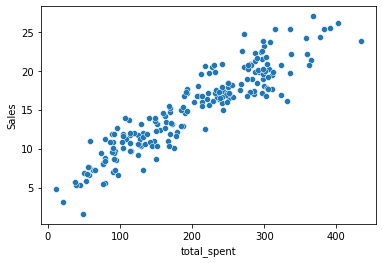

In [13]:
sns.scatterplot(data=df, x='total_spent', y='Sales')

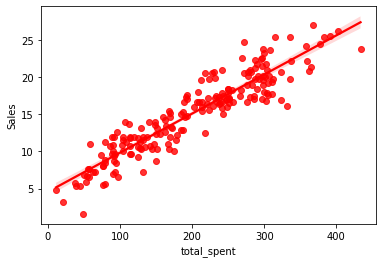

In [14]:
sns.regplot(data=df, x='total_spent', y='Sales', color='red') #OLS

In [15]:
x = df['total_spent']
y = df['Sales']

In [16]:
#help(sns.regplot)

In [17]:
#help(np.polyfit)

In [18]:
np.polyfit(x,y, deg=1)

array([0.0525585, 4.573573 ])

In [19]:
potential_spend = np.linspace(0,500,100) #x
potential_spend

array([  0.        ,   5.05050505,  10.1010101 ,  15.15151515,
        20.2020202 ,  25.25252525,  30.3030303 ,  35.35353535,
        40.4040404 ,  45.45454545,  50.50505051,  55.55555556,
        60.60606061,  65.65656566,  70.70707071,  75.75757576,
        80.80808081,  85.85858586,  90.90909091,  95.95959596,
       101.01010101, 106.06060606, 111.11111111, 116.16161616,
       121.21212121, 126.26262626, 131.31313131, 136.36363636,
       141.41414141, 146.46464646, 151.51515152, 156.56565657,
       161.61616162, 166.66666667, 171.71717172, 176.76767677,
       181.81818182, 186.86868687, 191.91919192, 196.96969697,
       202.02020202, 207.07070707, 212.12121212, 217.17171717,
       222.22222222, 227.27272727, 232.32323232, 237.37373737,
       242.42424242, 247.47474747, 252.52525253, 257.57575758,
       262.62626263, 267.67676768, 272.72727273, 277.77777778,
       282.82828283, 287.87878788, 292.92929293, 297.97979798,
       303.03030303, 308.08080808, 313.13131313, 318.18

In [20]:
help(np.linspace)

Help on function linspace in module numpy:

linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)
    Return evenly spaced numbers over a specified interval.
    
    Returns `num` evenly spaced samples, calculated over the
    interval [`start`, `stop`].
    
    The endpoint of the interval can optionally be excluded.
    
    .. versionchanged:: 1.16.0
        Non-scalar `start` and `stop` are now supported.
    
    .. versionchanged:: 1.20.0
        Values are rounded towards ``-inf`` instead of ``0`` when an
        integer ``dtype`` is specified. The old behavior can
        still be obtained with ``np.linspace(start, stop, num).astype(int)``
    
    Parameters
    ----------
    start : array_like
        The starting value of the sequence.
    stop : array_like
        The end value of the sequence, unless `endpoint` is set to False.
        In that case, the sequence consists of all but the last of ``num + 1``
        evenly spaced samples, so that 

In [21]:
#y = m*x + b
predicted_sales = 0.04868788*potential_spend + 4.24302822
predicted_sales

array([ 4.24302822,  4.4889266 ,  4.73482499,  4.98072337,  5.22662176,
        5.47252014,  5.71841852,  5.96431691,  6.21021529,  6.45611367,
        6.70201206,  6.94791044,  7.19380883,  7.43970721,  7.68560559,
        7.93150398,  8.17740236,  8.42330075,  8.66919913,  8.91509751,
        9.1609959 ,  9.40689428,  9.65279266,  9.89869105, 10.14458943,
       10.39048782, 10.6363862 , 10.88228458, 11.12818297, 11.37408135,
       11.61997974, 11.86587812, 12.1117765 , 12.35767489, 12.60357327,
       12.84947165, 13.09537004, 13.34126842, 13.58716681, 13.83306519,
       14.07896357, 14.32486196, 14.57076034, 14.81665873, 15.06255711,
       15.30845549, 15.55435388, 15.80025226, 16.04615064, 16.29204903,
       16.53794741, 16.7838458 , 17.02974418, 17.27564256, 17.52154095,
       17.76743933, 18.01333771, 18.2592361 , 18.50513448, 18.75103287,
       18.99693125, 19.24282963, 19.48872802, 19.7346264 , 19.98052479,
       20.22642317, 20.47232155, 20.71821994, 20.96411832, 21.21

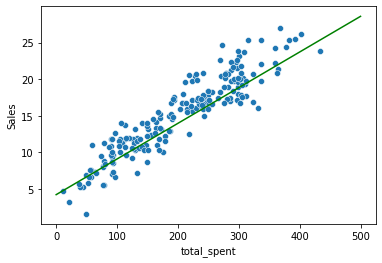

In [22]:
sns.scatterplot(x='total_spent', y='Sales', data=df) #scatter plot
plt.plot(potential_spend, predicted_sales, color='green') #line

In [23]:
spend = 200
predicted_sales = 0.04868788*spend + 4.24302822
predicted_sales

13.98060422

In [24]:
#Y = B3x**3 + B2x**2 + B3x + B0
np.polyfit(x,y, deg=3)

array([ 4.49497819e-08, -7.06143726e-05,  7.48845278e-02,  2.94654345e+00])

In [25]:
pot_spend = np.linspace(0,500,100)

In [26]:
pred_sales = 3.07615033e-07*pot_spend**3 + -1.89392449e-04*pot_spend**2 + 8.20886302e-02*pot_spend + 2.70495053e+00
pred_sales

array([ 2.70495053,  3.11474825,  3.51512186,  3.90630911,  4.28854779,
        4.66207567,  5.02713053,  5.38395013,  5.73277224,  6.07383466,
        6.40737513,  6.73363145,  7.05284138,  7.3652427 ,  7.67107318,
        7.97057059,  8.2639727 ,  8.5515173 ,  8.83344215,  9.10998503,
        9.38138371,  9.64787596,  9.90969955, 10.16709227, 10.42029188,
       10.66953616, 10.91506288, 11.15710981, 11.39591473, 11.63171541,
       11.86474963, 12.09525515, 12.32346975, 12.54963121, 12.77397729,
       12.99674578, 13.21817443, 13.43850104, 13.65796337, 13.87679919,
       14.09524628, 14.31354241, 14.53192536, 14.75063289, 14.96990278,
       15.18997281, 15.41108075, 15.63346437, 15.85736144, 16.08300974,
       16.31064705, 16.54051112, 16.77283975, 17.0078707 , 17.24584174,
       17.48699065, 17.73155521, 17.97977318, 18.23188233, 18.48812045,
       18.74872531, 19.01393467, 19.28398632, 19.55911802, 19.83956755,
       20.12557268, 20.41737119, 20.71520085, 21.01929943, 21.32

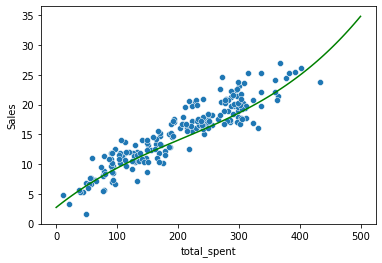

In [27]:
sns.scatterplot(x='total_spent', y='Sales', data=df) #scatter plot
plt.plot(pot_spend, pred_sales, color='green') #line

Text(0.5, 1.0, 'Newspaper Spend')

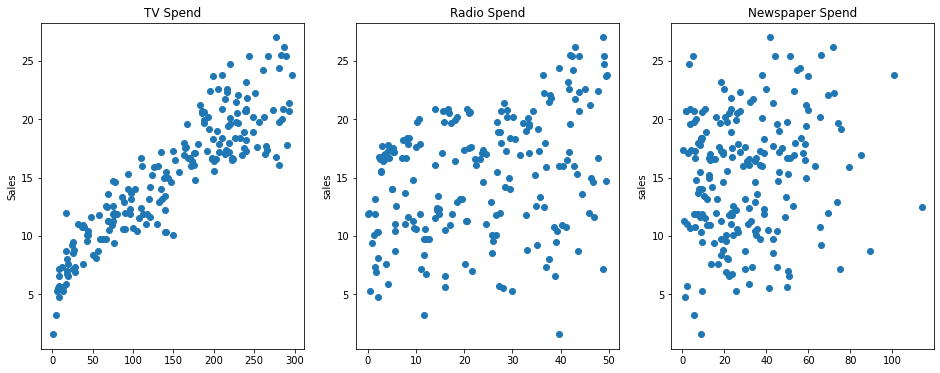

In [28]:
fig,axes = plt.subplots(nrows=1, ncols=3, figsize=(16,6))

axes[0].plot(df['TV'], df['Sales'], 'o')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")


axes[1].plot(df['Radio'], df['Sales'], 'o')
axes[1].set_ylabel("sales")
axes[1].set_title("Radio Spend")

axes[2].plot(df['Newspaper'], df['Sales'], 'o')
axes[2].set_ylabel("sales")
axes[2].set_title("Newspaper Spend")

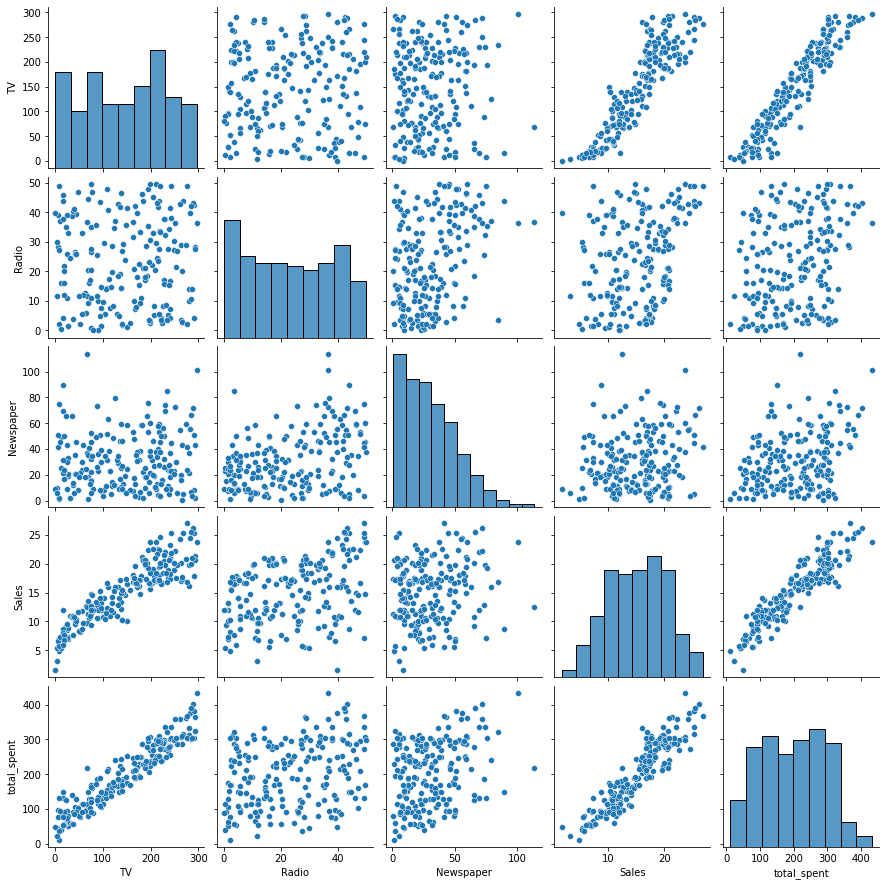

In [29]:
sns.pairplot(df)

In [30]:
x = df.drop(['Sales', 'total_spent'], axis=1)
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=101)

In [32]:
X_train.head()

,TV,Radio,Newspaper
154,187.8,21.1,9.5
114,78.2,46.8,34.5
118,125.7,36.9,79.2
64,131.1,42.8,28.9
165,234.5,3.4,84.8


In [33]:
X_test.head()

,TV,Radio,Newspaper
37,74.7,49.4,45.7
109,255.4,26.9,5.5
31,112.9,17.4,38.6
89,109.8,47.8,51.4
66,31.5,24.6,2.2


In [34]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets.
    
    Quick utility that wraps input validation and
    ``next(ShuffleSplit().split(X, y))`` and application to input data
    into a single call for splitting (and optionally subsampling) data in a
    oneliner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to 

In [35]:
len(df)

200

In [36]:
len(X_train)

134

In [37]:
len(X_test)

66

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
#help(LinearRegression())

In [40]:
model = LinearRegression()

In [41]:
model.fit(X_train, y_train)

LinearRegression()

In [42]:
test_pred = model.predict(X_test)
test_pred

array([13.84736062, 21.6208545 , 12.4506434 , 15.53800991,  9.13572388,
        7.32848067, 22.13382615, 18.99389515, 12.5074889 , 20.10480143,
       11.14471789, 16.00799576, 17.13131444, 20.51391413, 18.52689489,
        9.81871779, 19.29995509, 10.02472134,  8.55196221, 21.07099084,
        7.84483773, 18.13469703, 24.90087497, 23.23638138,  9.50153866,
       15.6580894 , 23.83636942,  8.88965111, 14.71191831, 10.08773315,
        9.28121309, 20.03204425, 12.50942245,  6.7209499 , 17.73745681,
        9.90528961, 10.54065531, 10.3248605 ,  9.01341274, 13.48442892,
       11.40463282, 12.32027425, 11.24446527,  7.66448064, 11.63858892,
       10.59311539,  8.22759878, 18.42554295, 15.2491901 , 20.20019412,
       11.07711531, 16.71290321, 20.96270351, 12.69856152, 15.72864026,
        6.15801816, 24.13296025, 11.37314587, 21.46171542, 16.49013139,
       16.70390396, 24.54896417,  9.00346399, 19.27803416, 16.88593651,
       21.81240684])

In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [44]:
mean_absolute_error(y_test, test_pred )

1.4217227776233654

In [45]:
mean_squared_error(y_test, test_pred)

3.0821373099675746

In [46]:
np.sqrt(mean_squared_error(y_test, test_pred))

1.7556016945672999

#Now we are checking whether linear regression model is valid for our dataset or not

In [47]:

test_residuals = y_test - test_pred
test_residuals

37     0.852639
109   -1.820855
31    -0.550643
89     1.161990
66     1.864276
         ...   
183    1.651036
127    2.896536
53     1.921966
100   -0.185937
93     0.387593
Name: Sales, Length: 66, dtype: float64

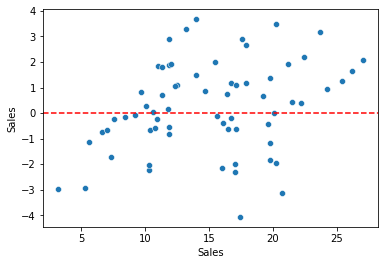

In [48]:
sns.scatterplot(x=y_test, y= test_residuals) #residual plot
plt.axhline(y=0, color='red', ls='--')

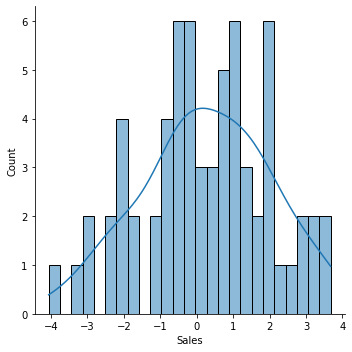

In [49]:
sns.displot(test_residuals, bins=25, kde=True)

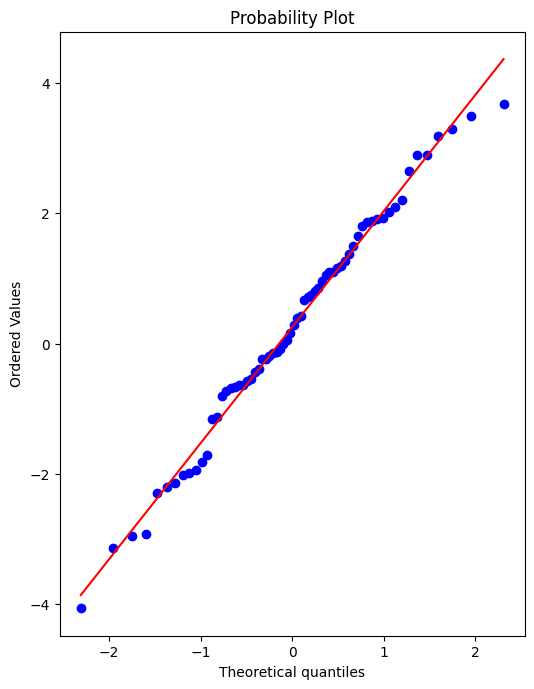

In [50]:
import scipy as sp

# Create a figure and axis to plot on
fig, ax = plt.subplots(figsize=(6,8),dpi=100)
# probplot returns the raw values if needed
# we just want to see the plot, so we assign these values to _
_ = sp.stats.probplot(test_residuals,plot=ax)

In [51]:
model.coef_

array([ 0.05475947,  0.11110453, -0.00941068])

In [52]:
y_hat = model.predict(x)

Text(0.5, 1.0, 'Newspaper Spend')

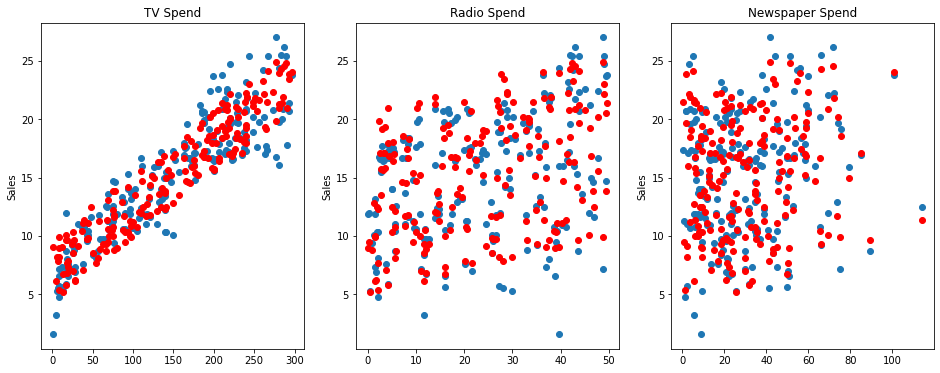

In [53]:
fig,axes = plt.subplots(nrows=1, ncols=3, figsize=(16,6))

axes[0].plot(df['TV'], df['Sales'], 'o')
axes[0].plot(df['TV'], y_hat, 'o', color='red')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")


axes[1].plot(df['Radio'], df['Sales'], 'o')
axes[1].plot(df['Radio'], y_hat, 'o', color='red')
axes[1].set_ylabel("Sales")
axes[1].set_title("Radio Spend")

axes[2].plot(df['Newspaper'], df['Sales'], 'o')
axes[2].plot(df['Newspaper'], y_hat, 'o', color='red')
axes[2].set_ylabel("Sales")
axes[2].set_title("Newspaper Spend")

In [54]:
df = pd.read_csv('/content/drive/MyDrive/analysis/MEAN MODEL UNCERTAINTY FLANGED BEAM.csv')
df.head()

,F(EC2),F(MC10),F(ACI),F(AS3600),F(SANS),F(CCC),F(MASM),F(SNiP),F(NLT)
0,2.10,2.33,2.60,2.33,0.94,0.75,0.89,2.68,1.24
1,1.30,1.19,1.59,1.19,0.58,0.48,0.54,1.61,0.96
2,1.20,1.16,1.61,1.16,0.59,0.49,0.53,1.44,1.04
3,1.78,1.84,2.17,1.84,0.73,0.65,0.73,2.22,1.32
4,1.34,1.25,1.66,1.25,0.55,0.52,0.59,1.71,1.07


In [55]:
df.describe()

,F(EC2),F(MC10),F(ACI),F(AS3600),F(SANS),F(CCC),F(MASM),F(SNiP),F(NLT)
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000
mean,1.439688,1.281250,1.562813,1.281250,0.708906,0.574219,0.638906,1.955625,0.996719
std,0.570522,0.609099,0.578947,0.609099,0.327604,0.259461,0.296290,0.685723,0.202869
min,0.880000,0.660000,0.920000,0.660000,0.280000,0.280000,0.310000,1.160000,0.640000
25%,1.037500,0.880000,1.165000,0.880000,0.490000,0.407500,0.440000,1.467500,0.850000
50%,1.170000,1.020000,1.325000,1.020000,0.575000,0.480000,0.530000,1.640000,0.975000
75%,1.667500,1.477500,1.755000,1.477500,0.950000,0.720000,0.772500,2.360000,1.112500
max,3.180000,3.180000,3.260000,3.180000,1.600000,1.220000,1.420000,4.150000,1.470000


In [56]:
from scipy.stats import describe

In [57]:
describe(df['F(MASM)'])

DescribeResult(nobs=64, minmax=(0.31, 1.42), mean=0.63890625, variance=0.08778767361111112, skewness=1.1477925528789499, kurtosis=0.07036237763180608)

ARTIFICIAL NEURAL NETORK

In [101]:
df = pd.read_csv('/content/drive/MyDrive/analysis/Used/Data For ML.csv')
df.head()

,notation,bw(mm),a/d,d(mm),pl%,fck(Mpa),Vu_Rep(kN)
0,Adebar_1989_001_ST1,360.0,2.92,278.0,1.569,48.5,127.5
1,Adebar_1989_002_ST2,360.0,2.92,278.0,1.569,48.5,118.7
2,Adebar_1989_003_ST3,290.0,2.92,278.0,1.947,45.3,107.7
3,Adebar_1989_005_ST16,290.0,4.56,178.0,3.041,47.5,75.1
4,Adebar_1989_007_ST23,290.0,2.92,278.0,0.992,54.9,89.9


In [59]:
df.isnull().sum()

notation      8
bw(mm)        8
a/d           8
d(mm)         8
pl%           8
fck(Mpa)      8
Vu_Rep(kN)    8
dtype: int64

In [60]:
import tensorflow as tf
from tensorflow import keras

In [61]:
tf.version.VERSION

'2.9.2'

In [62]:
tf.config.experimental.list_physical_devices('GPU')

[]

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
df.shape

(792, 7)

In [102]:
df = df.dropna(axis=0)

In [66]:
df.shape

(784, 7)

In [67]:
df.isnull().sum()

notation      0
bw(mm)        0
a/d           0
d(mm)         0
pl%           0
fck(Mpa)      0
Vu_Rep(kN)    0
dtype: int64

In [103]:
df = df.drop('notation', axis =1)

In [104]:
df.head(5)

,bw(mm),a/d,d(mm),pl%,fck(Mpa),Vu_Rep(kN)
0,360.0,2.92,278.0,1.569,48.5,127.5
1,360.0,2.92,278.0,1.569,48.5,118.7
2,290.0,2.92,278.0,1.947,45.3,107.7
3,290.0,4.56,178.0,3.041,47.5,75.1
4,290.0,2.92,278.0,0.992,54.9,89.9


In [105]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Dropout
from tensorflow.keras import optimizers

In [106]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [107]:
import pathlib # for processing a path e.g., c:\documents\files\test_ds.csv
import matplotlib.pyplot as plt # for plotting data and creating different charts.
import numpy as np # for math and arrays
import pandas as pd # data from for the data.
import seaborn as sns # for plotting.

In [108]:
tf.random.set_seed(13) # to make sure the experiment is reproducible.
tf.debugging.set_log_device_placement(False)

In [109]:
df.shape

(784, 6)

In [110]:
temp_train_data, test_dataset =  train_test_split(df, test_size=0.25,random_state=101)

print( temp_train_data.shape )
print( test_dataset.shape )

(588, 6)
(196, 6)


In [112]:
test_dataset.tail()

,bw(mm),a/d,d(mm),pl%,fck(Mpa),Vu_Rep(kN)
476,140.0,2.5,200.0,0.359,15.84,20.4
363,154.0,5.0,271.3,1.802,11.38,32.0
29,76.0,4.0,127.0,2.618,21.24,17.2
39,76.0,5.5,127.0,4.091,26.62,14.0
6,127.0,3.0,203.2,3.927,58.39,69.3


In [113]:
y_test= test_dataset['Vu_Rep(kN)']

In [114]:
X_test = test_dataset.drop('Vu_Rep(kN)',axis=1)

In [117]:
X_test.head()

,bw(mm),a/d,d(mm),pl%,fck(Mpa)
744,152.0,2.77,252.5,3.351,26.83
134,102.0,3.72,136.7,2.890,28.07
42,76.0,6.50,127.0,4.091,23.28
100,203.0,3.00,356.0,1.739,28.84
536,203.0,3.78,402.8,0.468,22.34


In [118]:
train_data,val_data = train_test_split(temp_train_data, test_size=0.20,random_state=101)
print( train_data.shape )
print( val_data.shape )


(470, 6)
(118, 6)


In [120]:
y_train = train_data['Vu_Rep(kN)']

In [122]:
X_train = train_data.drop('Vu_Rep(kN)',axis = 1)

In [126]:
y_val = val_data['Vu_Rep(kN)']

In [127]:
X_val = val_data.drop('Vu_Rep(kN)',axis=1)

Data Normalizing

In [128]:
train_stats = X_train.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
bw(mm),470.0,218.731915,207.619199,50.000,152.000,153.0000,203.0000,3005.000
a/d,470.0,3.555660,0.979866,2.400,2.920,3.2700,4.0000,8.030
d(mm),470.0,351.188936,314.197096,57.200,207.250,268.2000,355.9000,3000.000
pl%,470.0,2.171130,1.150988,0.139,1.251,1.9815,2.7935,6.635
fck(Mpa),470.0,35.149404,21.038578,8.900,22.410,27.6600,39.4100,135.000


In [129]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(X_train)
normed_test_data = norm(X_test)
normed_valid_dataset = norm(X_val)

In [130]:
print(r'Train/Test/Validate splits: ')
print(f'Train    : {normed_train_data.shape} ')
print(f'Test     : {normed_test_data.shape} ')
print(f'Validate : {normed_valid_dataset.shape} ')

print(r'Train/Test/Validate labels: ')
print(f'Train Labels : {X_train.shape} ')
print(f'Test Labels  : {X_test.shape} ')
print(f'Test Labels  : {X_val.shape} ')

Train/Test/Validate splits: 
Train    : (470, 5) 
Test     : (196, 5) 
Validate : (118, 5) 
Train/Test/Validate labels: 
Train Labels : (470, 5) 
Test Labels  : (196, 5) 
Test Labels  : (118, 5) 


In [131]:
normed_train_data.head(10)

,bw(mm),a/d,d(mm),pl%,fck(Mpa)
612,-0.321415,-0.291529,-0.252036,-0.618712,-0.539932
597,0.391429,-0.618104,-0.401623,-1.109594,-0.102165
328,-0.306965,1.474018,2.358427,0.458624,-0.516642
491,-0.562240,0.453470,-0.633962,-0.688217,0.118382
637,-0.090222,-0.567077,0.047139,1.037257,2.127073
690,0.391429,-0.699748,3.338067,-1.162592,-0.368343
451,-0.321415,-0.189474,-0.314099,1.009455,-0.903550
420,-0.234718,-0.567077,-0.665789,-0.259890,0.610811
249,-0.302149,0.096279,-0.507290,0.082425,-0.382602
578,-0.321415,-0.067009,-0.167694,1.017274,1.791975


In [198]:
# We decalred a function for creating a model.
def build_model1_two_hidden_layers():
    # Keras model object created from Sequential class. This will be the container that contains all layers.
    model = Sequential()

    # The model so far is empty. It can be constructed by adding layers and compilation.
    # This Keras model with multiple hidden layers.
    
    # Input Layer with 10 Neurons
    model.add(Dense(5, input_shape = (normed_train_data.shape[1],)))    # Input layer => input_shape must be explicitly designated
#     model.add(Activation('relu')) # relu or sigmoid.
    
    model.add(Dense(50,Activation('relu')))                         # Hidden layer 1 => only output dimension should be designated (output dimension = # of Neurons = 50)
  
    model.add(Dense(64, Activation('relu')))                         # Hidden layer 2 => only output dimension should be designated (output dimension = # of Neurons = 64)
    
    
    model.add(Dense(24, Activation('relu')))                         # Hidden layer 2 => only output dimension should be designated (output dimension = # of Neurons = 50)
    
    
    model.add(Dense(1))                          # Output layer => output dimension = 1 since it is a regression problem
    
    # Activation: sigmoid, softmax, tanh, relu, LeakyReLU. 
    #Optimizer: SGD, Adam, RMSProp, etc. # https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
    learning_rate = 0.001
    optimizer = optimizers.Adam(learning_rate)
    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse', 'mape']) # for regression problems, mean squared error (MSE) is often employed
    
    return model

In [195]:
model = build_model1_two_hidden_layers()
print('Here is a summary of this model: ')
model.summary()


Here is a summary of this model: 
Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_77 (Dense)            (None, 5)                 30        
                                                                 
 dense_78 (Dense)            (None, 64)                384       
                                                                 
 dense_79 (Dense)            (None, 24)                1560      
                                                                 
 dense_80 (Dense)            (None, 3)                 75        
                                                                 
 dense_81 (Dense)            (None, 1)                 4         
                                                                 
Total params: 2,053
Trainable params: 2,053
Non-trainable params: 0
_________________________________________________________________


In [172]:
# We decalred a function for creating a model.
def build_model2_three_hidden_layers():
    # Keras model object created from Sequential class. This will be the container that contains all layers.
    model = Sequential()

    # The model so far is empty. It can be constructed by adding layers and compilation.
    # This Keras model with multiple hidden layers.
    
    # Input Layer with 32 Neurons
    model.add(Dense(5, input_shape = (normed_train_data.shape[1],)))    # Input layer => input_shape must be explicitly designated
#     model.add(Activation('relu')) # relu or sigmoid.
    
    model.add(Dense(32,Activation('relu')))                         # Hidden layer 1 => only output dimension should be designated (output dimension = # of Neurons = 32)
    
    
    model.add(Dense(64, Activation('relu')))                         # Hidden layer 2 => only output dimension should be designated (output dimension = # of Neurons = 64)
    
    
    model.add(Dense(128, Activation('relu')))                         # Hidden layer 3 => only output dimension should be designated (output dimension = # of Neurons = 128)

    
    model.add(Dense(1))                          # Output layer => output dimension = 1 since it is a regression problem
    
    # Activation: sigmoid, softmax, tanh, relu, LeakyReLU. 
    #Optimizer: SGD, Adam, RMSProp, etc. # https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
    learning_rate = 0.01
    optimizer = optimizers.SGD(learning_rate)
    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse', 'mape']) # for regression problems, mean squared error (MSE) is often employed
    
    return model

model2 = build_model2_three_hidden_layers()
print('Here is a summary of this model: ')
model2.summary()

Here is a summary of this model: 
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_46 (Dense)            (None, 5)                 30        
                                                                 
 dense_47 (Dense)            (None, 32)                192       
                                                                 
 dense_48 (Dense)            (None, 64)                2112      
                                                                 
 dense_49 (Dense)            (None, 128)               8320      
                                                                 
 dense_50 (Dense)            (None, 1)                 129       
                                                                 
Total params: 10,783
Trainable params: 10,783
Non-trainable params: 0
_________________________________________________________________


In [137]:
pip install -q pyyaml h5py 

In [150]:


checkpoint_path = r"./content/drive/MyDrive/analysis/shear.cpkt"

# Create a callback that saves the model's weights
ckpt_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 monitor='val_loss', # or val_accuracy if you have it.
                                                 save_best_only=True, # Default false. If you don't change the file name then the output will be overritten at each step and only the last model will be saved.
                                                 save_weights_only=True, # True => model.save_weights (weights and no structure, you need JSON file for structure), False => model.save (saves weights & structure)
                                                 verbose=0,
                                                  )

# epoch

In [199]:
%%time
EPOCHS = 500
batch_size = 10 # 6 iteration

model = build_model1_two_hidden_layers()
print('Here is a summary of this model: ')
model.summary()


with tf.device('/CPU:0'): # it can be with '/CPU:0'
# with tf.device('/GPU:0'): # comment the previous line and uncomment this line to train with a GPU, if available.
    history = model.fit(
        normed_train_data, 
        y_train,
        batch_size = batch_size,
        epochs=EPOCHS, 
        verbose=0,
        shuffle=True,
        steps_per_epoch = int(normed_train_data.shape[0] / batch_size) ,
        validation_data = (normed_valid_dataset, y_val),
        callbacks=[tfdocs.modeling.EpochDots(), 
                 ckpt_callback
                  ],
        
    )

Here is a summary of this model: 
Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_87 (Dense)            (None, 5)                 30        
                                                                 
 dense_88 (Dense)            (None, 50)                300       
                                                                 
 dense_89 (Dense)            (None, 64)                3264      
                                                                 
 dense_90 (Dense)            (None, 24)                1560      
                                                                 
 dense_91 (Dense)            (None, 1)                 25        
                                                                 
Total params: 5,179
Trainable params: 5,179
Non-trainable params: 0
_________________________________________________________________

Epoch: 0, loss:2

In [200]:
print('Summary of the results after each epoch: ')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

Summary of the results after each epoch: 


,loss,mae,mse,mape,val_loss,val_mae,val_mse,val_mape,epoch
495,106.906822,6.966686,106.906822,9.671093,1483.566895,16.951244,1483.566895,13.708412,495
496,97.283852,6.606296,97.283852,9.235497,1612.071289,17.360525,1612.071289,14.081539,496
497,101.370735,6.744857,101.370735,9.472514,1358.307983,16.912027,1358.307983,13.971663,497
498,93.809608,6.628714,93.809608,9.308788,1369.259888,16.555267,1369.259888,13.875164,498
499,88.793953,6.531982,88.793953,8.809042,1395.341797,16.831341,1395.341797,14.029159,499


In [206]:
y_pred = model.predict(normed_test_data)
print('predicted values: ')
y_pred

7/7 [==============================] - 0s 2ms/step
predicted values: 


array([[  74.32522 ],
       [  24.364492],
       [  15.18414 ],
       [  91.02138 ],
       [  49.921196],
       [  69.22179 ],
       [ 249.55939 ],
       [  18.752686],
       [  52.410515],
       [  18.691093],
       [ 145.1145  ],
       [  47.599026],
       [  76.39494 ],
       [ 138.49832 ],
       [  12.153175],
       [  58.55436 ],
       [  46.790054],
       [ 155.58267 ],
       [ 195.19852 ],
       [  12.153175],
       [  47.185104],
       [ 157.55661 ],
       [  38.379704],
       [  43.92843 ],
       [  40.310577],
       [  94.72899 ],
       [  66.071785],
       [  86.53176 ],
       [  64.668655],
       [  21.788143],
       [ 407.56308 ],
       [  53.276955],
       [ 302.80725 ],
       [  97.62137 ],
       [ 186.60928 ],
       [  13.416888],
       [  13.870038],
       [  22.19814 ],
       [ 101.91307 ],
       [ 397.29483 ],
       [  24.92498 ],
       [  92.496025],
       [  57.155457],
       [  47.868378],
       [  88.36476 ],
       [  

In [158]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

Text(0, 0.5, 'MAE[Vexp]')

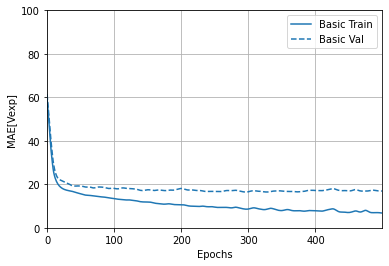

In [204]:
plotter.plot({'Basic': history}, metric = "mae")
plt.ylim([0, 100])
plt.ylabel('MAE[Vexp]')

7/7 [==============================] - 0s 2ms/step


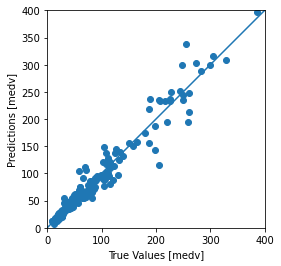

In [205]:
test_predictions = model.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [medv]')
plt.ylabel('Predictions [medv]')
lims = [0, 400]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [216]:
X_test

,bw(mm),a/d,d(mm),pl%,fck(Mpa),ANN
744,152.0,2.77,252.5,3.351,26.83,74.325218
134,102.0,3.72,136.7,2.890,28.07,24.364492
42,76.0,6.50,127.0,4.091,23.28,15.184140
100,203.0,3.00,356.0,1.739,28.84,91.021378
536,203.0,3.78,402.8,0.468,22.34,49.921196
...,...,...,...,...,...,...
476,140.0,2.50,200.0,0.359,15.84,25.027126
363,154.0,5.00,271.3,1.802,11.38,37.832035
29,76.0,4.00,127.0,2.618,21.24,13.461030
39,76.0,5.50,127.0,4.091,26.62,14.316211


In [217]:
X_test['ANN'] = y_pred

In [224]:
X_test

,bw(mm),a/d,d(mm),pl%,fck(Mpa),ANN
744,152.0,2.77,252.5,3.351,26.83,74.325218
134,102.0,3.72,136.7,2.890,28.07,24.364492
42,76.0,6.50,127.0,4.091,23.28,15.184140
100,203.0,3.00,356.0,1.739,28.84,91.021378
536,203.0,3.78,402.8,0.468,22.34,49.921196
...,...,...,...,...,...,...
476,140.0,2.50,200.0,0.359,15.84,25.027126
363,154.0,5.00,271.3,1.802,11.38,37.832035
29,76.0,4.00,127.0,2.618,21.24,13.461030
39,76.0,5.50,127.0,4.091,26.62,14.316211


In [219]:
import pip
pip.main(['install','openpyxl'])

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


0

In [220]:
import openpyxl as xls

In [221]:
Excel_file= pd.ExcelWriter('ANN_Analysis.xlsx')

In [222]:
X_test.to_excel(Excel_file)   

In [227]:
Excel_file.save()